In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd 
import numpy as np
%matplotlib inline

In [2]:
#Оценки Юла-Уокера без цензурирования

In [2]:
x = []
u = [] 
x.append(0)
a = 0.4

def yul_walker():
    Var1 = 0
    Var2 = 0
    for j in range(1000):
        c1 = 0
        c0 = 0
        for t in range(0, 1000):
            u_t = random.normalvariate(mu=0, sigma=1)
            u.append(u_t)
            x_t = a * x[t] + u_t
            c1 += x[t] * x_t 
            c0 += x_t ** 2
            x.append(x_t)
        c1 /= (1000 - 1)
        c0 /= (1000)
        a_estim = c1 / (c0)
        Var1 += (a_estim - a) ** 2
        var_estim = c0 * (1 - a_estim ** 2)
        Var2 += (var_estim - 1) ** 2
    Var1 /= 1000
    Var2 /= 1000
    return Var1, Var2

In [3]:
var_a = []
var_sigma = [] 
for i in range(20):
    Var1, Var2 = yul_walker()
    var_a.append(Var1)
    var_sigma.append(Var2)

In [5]:
x = []
u = [] 
x.append(0)
a = 0.4

def yul_walker5(T, M):
    Var1 = 0
    Var2 = 0
    for j in range(M):
        c1 = 0
        c0 = 0
        for t in range(0, T):
            u_t = random.normalvariate(mu=0, sigma=1)
            u.append(u_t)
            x_t = a * x[t] + u_t
            c1 += x[t] * x_t 
            c0 += x_t ** 2
            x.append(x_t)
        c1 /= (T - 1)
        c0 /= (T)
        a_estim = c1 / (c0)
        Var1 += (a_estim - a) ** 2
        var_estim = c0 * (1 - a_estim ** 2)
        Var2 += (var_estim - 1) ** 2
    Var1 /= M
    Var2 /= M
    return Var1, Var2

In [6]:
var_a = []
var_sigma = [] 
T = []
for i in range(100, 2001, 100):
    Var1, Var2 = yul_walker5(i, 1000)
    var_a.append(Var1)
    var_sigma.append(Var2)
    T.append(i)

In [7]:
data = {'Длина реализации': T , 'Вариция оценки a': var_a, 'Вариация дисперсии': var_sigma} 
 
df = pd.DataFrame(data)

In [8]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Длина реализации,100.000000,200.000000,300.000000,400.000000,500.000000,600.000000,700.000000,800.000000,900.000000,1000.000000,1100.000000,1200.000000,1300.000000,1400.000000,1500.000000,1600.000000,1700.000000,1800.000000,1900.000000,2000.000000
Вариция оценки a,0.006424,0.004370,0.002562,0.001800,0.001582,0.001706,0.001326,0.001062,0.001125,0.001328,0.001414,0.001192,0.000766,0.000766,0.000666,0.000532,0.000518,0.000446,0.000386,0.000369
Вариация дисперсии,0.025699,0.014048,0.008767,0.006767,0.005719,0.004430,0.003958,0.003340,0.003084,0.002691,0.002493,0.002345,0.002055,0.002086,0.001771,0.001729,0.001683,0.001435,0.001380,0.001378


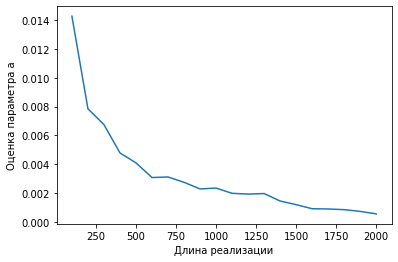

In [8]:
plt.xlabel('Длина реализации')
plt.ylabel('Оценка параметра a')
plt.plot(T, var_a)

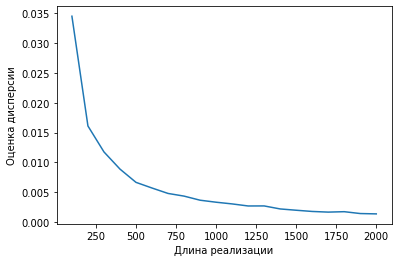

In [10]:
plt.xlabel('Длина реализации')
plt.ylabel('Оценка дисперсии')
plt.plot(T, var_sigma)

In [10]:
#Оценки Юла-Уокера с цензурированием n% наблюдений

In [11]:
u = [] 
a = 0.4
y = [0 for _ in range(1000)]
k = []

def yul_walker_cens(num):
    Var1 = 0
    Var2 = 0
    for j in range(1000):
        x = []
        x.append(0)
        c1 = 0
        c0 = 0
        for t in range(0, 1000):
            u_t = random.normalvariate(mu=0, sigma=1)
            x_t = a * x[t] + u_t
            x.append(x_t)
        k = sorted(x)
        c = k[num]
        for i in range(1000):
            if x[i] > c:
                y[i] = x[i]
            else:
                y[i] = c
        c0 += y[999] * y[999]
        for t in range(999):
            c1 += y[t] * y[t + 1] 
            c0 += y[t] ** 2
        c1 /= (1000 - 1)
        c0 /= (1000)
        a_estim = c1 / (c0)
        Var1 += (a_estim - a) ** 2
        var_estim = c0 * (1 - a_estim ** 2)
        Var2 += (var_estim - 1) ** 2
    Var1 /= 1000
    Var2 /= 1000
    return Var1, Var2

In [12]:
var_a_cens = []
var_sigma_cens = [] 
C = []
temp = 49
for _ in range(20):
    Var1, Var2= yul_walker_cens(temp)
    var_a_cens.append(Var1)
    var_sigma_cens.append(Var2)
    temp += 50

In [14]:
C = [49 + 50 * i for i in range(20)]

In [13]:
C = [f'{5 * i}%' for i in range(1, 20)]
C.append('99%')

In [16]:
print(len(C), len(var_a_cens), len(var_sigma_cens))

20 20 20


In [14]:
data_cens = {'Процент цензурированных наблюдений': C , 'Вариaция оценки a': var_a_cens, 'Вариация дисперсии': var_sigma_cens} 
 
df = pd.DataFrame(data_cens)

In [15]:
df

,Процент цензурированных наблюдений,Вариaция оценки a,Вариация дисперсии
0,5%,0.000818,0.008475
1,10%,0.000951,0.025354
2,15%,0.001030,0.051552
3,20%,0.001132,0.084333
4,25%,0.001111,0.121384
5,30%,0.001225,0.163434
6,35%,0.001846,0.206176
7,40%,0.004258,0.250355
8,45%,0.010160,0.293527
9,50%,0.022357,0.338462


In [19]:
df1 = df.iloc [0:6,:]
df2 = df.iloc [14:20,:]
df = pd.concat([df1, df2])

In [20]:
df.transpose()

,0,1,2,3,4,5,14,15,16,17,18,19
Процент цензурированных наблюдений,5%,10%,15%,20%,25%,30%,75%,80%,85%,90%,95%,99%
Вариaция оценки a,0.000917,0.00091,0.001044,0.001127,0.001174,0.00119,0.23187,0.278292,0.314862,0.339666,0.354123,0.359982
Вариация дисперсии,0.008332,0.025691,0.052144,0.084371,0.121478,0.163558,0.624255,0.699793,0.780978,0.86174,0.937716,0.999402


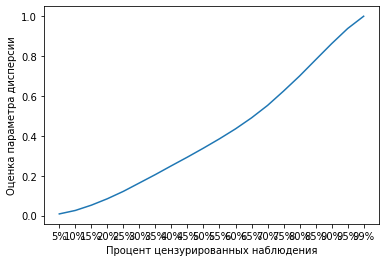

In [21]:
plt.xlabel('Процент цензурированных наблюдения')
plt.ylabel('Оценка параметра дисперсии')
plt.plot(C, var_sigma_cens)

NameError: name 'C' is not defined

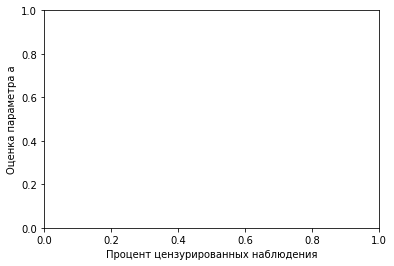

In [9]:
plt.xlabel('Процент цензурированных наблюдения')
plt.ylabel('Оценка параметра a')
plt.plot(C, var_a_cens)

In [23]:
#Проверка генерации ряда

In [24]:
# x= []
# x.append(0)
# c = -2
# c1 = c0 = 0
# for t in range(0, 1000):
#     u_t = random.normalvariate(mu=0, sigma=1)
#     u.append(u_t)
#     x_t = a * x[t] + u_t  
#     c1 += x[t] * x_t 
#     c0 += x_t ** 2
#     if x_t < c:    
#         x.append(x_t)
#     else:
#         x.append(c)


In [25]:
#Оценки Юла-Уокера для цензурирования наблюдения по константе C

In [26]:
u = [] 
a = 0.4
y = [0 for _ in range(1000)]
k = []

def yul_walker_cens_2(c):
    Var1 = 0
    Var2 = 0
    for j in range(1000):
        x = []
        x.append(0)
        c1 = 0
        c0 = 0
        for t in range(0, 1000):
            u_t = random.normalvariate(mu=0, sigma=1)
            x_t = a * x[t] + u_t
            x.append(x_t)
        for i in range(1000):
            if x[i] < c:
                y[i] = x[i]
            else:
                y[i] = c
        c0 += y[999] * y[999]
        for t in range(999):
            c1 += y[t] * y[t + 1] 
            c0 += y[t] ** 2
        c1 /= (1000 - 1)
        c0 /= (1000)
        a_estim = c1 / (c0)
        Var1 += (a_estim - a) ** 2
        var_estim = c0 * (1 - a_estim ** 2)
        Var2 += (var_estim - 1) ** 2
    Var1 /= 1000
    Var2 /= 1000
    return Var1, Var2

In [27]:
var_a_cens_2 = []
var_sigma_cens_2 = [] 
C_2 = []
temp_2 = -2
for i in range(21):
    Var1, Var2 = yul_walker_cens_2(temp_2)
    var_a_cens_2.append(Var1)
    var_sigma_cens_2.append(Var2)
    C_2.append(temp_2)
    temp_2 += 0.2

In [28]:
data_cens = {'Коэффициент C': C_2 , 'Вариaция оценки a': var_a_cens_2, 'Вариация дисперсии': var_sigma_cens_2} 
 
df = pd.DataFrame(data_cens)

In [29]:
df

,Коэффициент C,Вариaция оценки a,Вариация дисперсии
0,-2.000000e+00,0.357190,0.962217
1,-1.800000e+00,0.354548,0.940109
2,-1.600000e+00,0.349579,0.908073
3,-1.400000e+00,0.340459,0.863902
4,-1.200000e+00,0.323959,0.804863
5,-1.000000e+00,0.296525,0.735466
6,-8.000000e-01,0.252804,0.653554
7,-6.000000e-01,0.191232,0.567073
8,-4.000000e-01,0.119831,0.482903
9,-2.000000e-01,0.058967,0.406948


In [30]:
# df1 = df.iloc [0:7,:]
# df2 = df.iloc [35:42,:]
# df = pd.concat([df1, df2])

In [31]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Коэффициент C,-2.000000,-1.800000,-1.600000,-1.400000,-1.200000,-1.000000,-0.800000,-0.600000,-0.400000,-0.200000,...,0.200000,0.400000,0.600000,0.800000,1.000000,1.200000,1.400000,1.600000,1.800000,2.000000
Вариaция оценки a,0.357190,0.354548,0.349579,0.340459,0.323959,0.296525,0.252804,0.191232,0.119831,0.058967,...,0.005653,0.001653,0.001140,0.001116,0.001086,0.000953,0.000998,0.000886,0.000889,0.000850
Вариация дисперсии,0.962217,0.940109,0.908073,0.863902,0.804863,0.735466,0.653554,0.567073,0.482903,0.406948,...,0.275689,0.214033,0.157345,0.108198,0.069536,0.043184,0.025215,0.014191,0.008372,0.004655


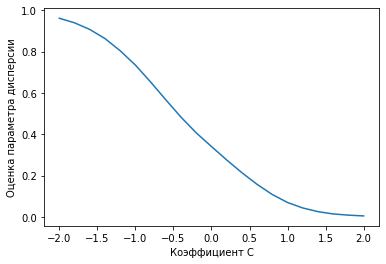

In [32]:
plt.xlabel('Коэффициент C')
plt.ylabel('Оценка параметра дисперсии')
plt.plot(C_2, var_sigma_cens_2)

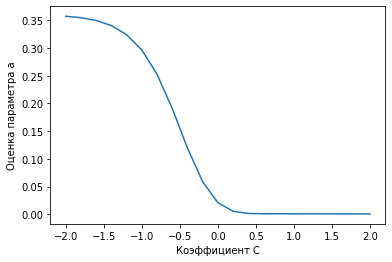

In [33]:
plt.xlabel('Коэффициент C')
plt.ylabel('Оценка параметра a')
plt.plot(C_2, var_a_cens_2)

In [4]:
u = [] 
a = 0.4
y = [0 for _ in range(1000)]
k = []

def yul_walker_cens_3(c):
    Var1_x = 0
    Var2_x = 0
    Var1_y = 0
    Var2_y = 0
    for j in range(1000):
        x = []
        x.append(0)
        c1_x = 0
        c0_x = 0
        c1_y = 0
        c0_y = 0
        for t in range(0, 1000):
            u_t = random.normalvariate(mu=0, sigma=1)
            x_t = a * x[t] + u_t
            x.append(x_t)
        for i in range(1000):
            if x[i] < c:
                y[i] = x[i]
            else:
                y[i] = c
        c0_y += y[999] * y[999]
        for t in range(999):
            c1_y += y[t] * y[t + 1] 
            c0_y += y[t] ** 2
        c1_y /= (1000 - 1)
        c0_y /= (1000)
        a_estim_y = c1_y / (c0_y)
        Var1_y += (a_estim_y - a) ** 2
        var_estim_y = c0_y * (1 - a_estim_y ** 2)
        Var2_y += (var_estim_y - 1) ** 2
        c0_x += x[999] * x[999]
        for t in range(999):
            c1_x += x[t] * x[t + 1] 
            c0_x += x[t] ** 2
        c1_x /= (1000 - 1)
        c0_x /= (1000)
        a_estim_x = c1_x / (c0_x)
        Var1_x += (a_estim_x - a) ** 2
        var_estim_x = c0_x * (1 - a_estim_x ** 2)
        Var2_x += (var_estim_x - 1) ** 2
    Var1_x /= 1000
    Var2_x /= 1000
    Var1_y /= 1000
    Var2_y /= 1000
    return abs(Var1_x - Var1_y), abs(Var2_x - Var2_y), Var2_x, Var2_y

In [5]:
var_a_cens_3 = []
var_sigma_cens_3 = [] 
C_3 = []
temp_3 = -2.5
Var_2_x = []
Var_2_y = []
for i in range(20):
    Var1, Var2,Var2_x, Var2_y = yul_walker_cens_3(temp_3)
    var_a_cens_3.append(Var1)
    var_sigma_cens_3.append(Var2)
    Var_2_x.append(Var2_x)
    Var_2_y.append(Var2_y)
    C_3.append(temp_3)
    temp_3 += 0.25

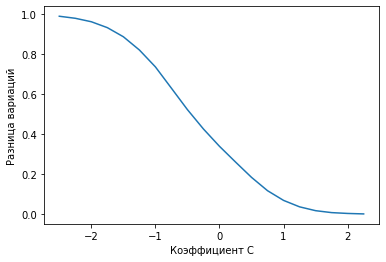

In [18]:
plt.xlabel('Коэффициент C')
plt.ylabel('Разница вариаций')
plt.plot(C_3, var_sigma_cens_3)

In [33]:
data_cens = {'Коэффициент C': C_3 , 'Вариaция дисперсиии без цензурирования': \
             Var_2_x, 'Вариация дисперсии c цензурированием': Var_2_y} 
 
df = pd.DataFrame(data_cens)

In [98]:
df1 = df.iloc [0:6,:]
df2 = df.iloc [14:20,:]
df = pd.concat([df1, df2])

In [34]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Коэффициент C,-2.500000,-2.250000,-2.000000,-1.750000,-1.500000,-1.250000,-1.000000,-0.750000,-0.500000,-0.250000,0.000000,0.250000,0.500000,0.750000,1.000000,1.250000,1.500000,1.750000,2.00000,2.250000
Вариaция дисперсиии без цензурирования,0.001927,0.002057,0.001901,0.002026,0.001934,0.001997,0.002091,0.002125,0.002033,0.001898,0.002001,0.001926,0.002046,0.001993,0.001894,0.001988,0.001995,0.001901,0.00195,0.001927
Вариация дисперсии c цензурированием,0.989825,0.979737,0.962312,0.932965,0.887400,0.821375,0.737116,0.630631,0.523495,0.426664,0.340377,0.261981,0.185405,0.118787,0.070258,0.038183,0.019047,0.009272,0.00517,0.002797


In [7]:
u = [] 
a = 0.4
y = [0 for _ in range(1000)]
k = []

def yul_walker_cens_4(num):
    Var1_x = 0
    Var2_x = 0
    Var1_y = 0
    Var2_y = 0
    for j in range(1000):
        x = []
        x.append(0)
        c1_x = 0
        c0_x = 0
        c1_y = 0
        c0_y = 0
        for t in range(0, 1000):
            u_t = random.normalvariate(mu=0, sigma=1)
            x_t = a * x[t] + u_t
            x.append(x_t)
        k = sorted(x)
        c = k[num]
        for i in range(1000):
            if x[i] < c:
                y[i] = x[i]
            else:
                y[i] = c
        c0_y += y[999] * y[999]
        for t in range(999):
            c1_y += y[t] * y[t + 1] 
            c0_y += y[t] ** 2
        c1_y /= (1000 - 1)
        c0_y /= (1000)
        a_estim_y = c1_y / (c0_y)
        Var1_y += (a_estim_y - a) ** 2
        var_estim_y = c0_y * (1 - a_estim_y ** 2)
        Var2_y += (var_estim_y - 1) ** 2
        c0_x += x[999] * x[999]
        for t in range(999):
            c1_x += x[t] * x[t + 1] 
            c0_x += x[t] ** 2
        c1_x /= (1000 - 1)
        c0_x /= (1000)
        a_estim_x = c1_x / (c0_x)
        Var1_x += (a_estim_x - a) ** 2
        var_estim_x = c0_x * (1 - a_estim_x ** 2)
        Var2_x += (var_estim_x - 1) ** 2
    Var1_x /= 1000
    Var2_x /= 1000
    Var1_y /= 1000
    Var2_y /= 1000
    return abs(Var1_x - Var1_y), abs(Var2_x - Var2_y), Var2_x, Var2_y

In [8]:
var_a_cens_4 = []
var_sigma_cens_4 = [] 
C_4 = []
Var_4_x = []
Var_4_y = []
temp_4 = 49
for i in range(20):
    Var1, Var2,Var4_x, Var4_y = yul_walker_cens_4(temp_4)
    var_a_cens_4.append(Var1)
    var_sigma_cens_4.append(Var2)
    Var_4_x.append(Var4_x)
    Var_4_y.append(Var4_y)
    temp_4 += 50

In [22]:
C_4 = [f'{5 * i}%' for i in range(1, 20)]
C_4.append('99%')

Text(-2.7, 0.2, 'blue - без цензурирования')

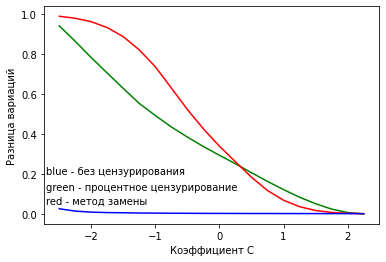

In [23]:
plt.xlabel('Коэффициент C')
plt.ylabel('Разница вариаций')
plt.plot(C_3, var_sigma_cens_4, color='green')
plt.plot(C_3, var_sigma_cens_3, color='red')
plt.plot(C_3, var_sigma, color='blue')
plt.text (-2.7, 0.05, 'red - метод замены')
plt.text (-2.7, 0.12,'green - процентное цензурирование')
plt.text (-2.7, 0.2,'blue - без цензурирования')

In [30]:
c_n = []
c_c = []
for i in range(len(var_sigma)):
    c_c.append((var_sigma[i] - var_sigma_cens_3[i]))
    c_n.append((var_sigma[i] - var_sigma_cens_4[i]))
    

In [13]:
var_a_cens_3

[0.358713507875496,
 0.35793146038431556,
 0.3563939730223976,
 0.352867243280703,
 0.3448927464321137,
 0.3284626885244247,
 0.2956284156735788,
 0.23801721755857963,
 0.15511527308187556,
 0.07135683469300683,
 0.02040157945495954,
 0.003174841601143448,
 0.00036541921242566676,
 0.0002998331041601423,
 0.00026559377194270556,
 0.00017369590462405716,
 0.0001117305437584212,
 9.233668845152099e-06,
 9.916466071662388e-06,
 5.691213922498365e-07]

In [24]:
data = { 'Разница вариaций параметра a с процентным цензурированием': var_a_cens_3, 
        'Разница вариaций параметра a при помощи метода замены': var_a_cens_4,
        'Разница вариaций дисперсиии с процентным цензурированием': var_sigma_cens_3,
        'Разница вариaций дисперсиии при помощи метода замены': var_sigma_cens_4,
        'Вариация дисперсии без цензурирования': var_sigma,
        'Вариация параметра a без цензурирования': var_a,
        
         
         
       } 
 
dff = pd.DataFrame(data)

In [23]:
app

{'Разница вариaций параметра a с процентным цензурированием': [0.358713507875496,
  0.35793146038431556,
  0.3563939730223976,
  0.352867243280703,
  0.3448927464321137,
  0.3284626885244247,
  0.2956284156735788,
  0.23801721755857963,
  0.15511527308187556,
  0.07135683469300683,
  0.02040157945495954,
  0.003174841601143448,
  0.00036541921242566676,
  0.0002998331041601423,
  0.00026559377194270556,
  0.00017369590462405716,
  0.0001117305437584212,
  9.233668845152099e-06,
  9.916466071662388e-06,
  5.691213922498365e-07],
 'Разница вариaций параметра a при помощи метода замены': [0.35367705149746936,
  0.3395776801389156,
  0.3151584297639137,
  0.2797198079412501,
  0.2333810232613807,
  0.1791507959567549,
  0.12568684533404734,
  0.08127244838070662,
  0.04434364365110973,
  0.022439227223394562,
  0.00905247448204571,
  0.003510415812373326,
  0.001034014408341021,
  0.00040579355037551957,
  0.0003539021295796763,
  0.00023895697625570238,
  0.0001835753554772679,
  0.000119

In [25]:
dff.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Разница вариaций параметра a с процентным цензурированием,0.358714,0.357931,0.356394,0.352867,0.344893,0.328463,0.295628,0.238017,0.155115,0.071357,0.020402,0.003175,0.000365,0.000300,0.000266,0.000174,0.000112,0.000009,0.000010,5.691214e-07
Разница вариaций параметра a при помощи метода замены,0.353677,0.339578,0.315158,0.279720,0.233381,0.179151,0.125687,0.081272,0.044344,0.022439,0.009052,0.003510,0.001034,0.000406,0.000354,0.000239,0.000184,0.000119,0.000010,6.798350e-07
Разница вариaций дисперсиии с процентным цензурированием,0.987688,0.977872,0.960593,0.932578,0.886365,0.820500,0.733183,0.629876,0.522528,0.426143,0.335726,0.259761,0.184227,0.119563,0.068645,0.036899,0.017360,0.007656,0.002831,8.352744e-04
Разница вариaций дисперсиии при помощи метода замены,0.939350,0.863583,0.782675,0.703790,0.625719,0.552426,0.489652,0.435990,0.383061,0.339185,0.295477,0.249390,0.205527,0.163285,0.122810,0.083273,0.050853,0.025367,0.007070,1.658830e-06
Вариация дисперсии без цензурирования,0.002590,0.002511,0.002856,0.002615,0.002715,0.002803,0.002741,0.002449,0.002820,0.002807,0.002569,0.002890,0.002626,0.002763,0.002474,0.002699,0.002573,0.002895,0.002855,2.940101e-03
Вариация параметра a без цензурирования,0.000659,0.000625,0.000654,0.000609,0.000657,0.000673,0.000683,0.000635,0.000621,0.000680,0.000697,0.000745,0.000631,0.000655,0.000608,0.000650,0.000639,0.000683,0.000634,6.582746e-04


In [26]:
df1 = dff.iloc [0:6,:]
df2 = dff.iloc [14:20,:]
dff = pd.concat([df1, df2])

In [27]:
dff.transpose()

,0,1,2,3,4,5,14,15,16,17,18,19
Разница вариaций параметра a с процентным цензурированием,0.358714,0.357931,0.356394,0.352867,0.344893,0.328463,0.000266,0.000174,0.000112,0.000009,0.000010,5.691214e-07
Разница вариaций параметра a при помощи метода замены,0.353677,0.339578,0.315158,0.279720,0.233381,0.179151,0.000354,0.000239,0.000184,0.000119,0.000010,6.798350e-07
Разница вариaций дисперсиии с процентным цензурированием,0.987688,0.977872,0.960593,0.932578,0.886365,0.820500,0.068645,0.036899,0.017360,0.007656,0.002831,8.352744e-04
Разница вариaций дисперсиии при помощи метода замены,0.939350,0.863583,0.782675,0.703790,0.625719,0.552426,0.122810,0.083273,0.050853,0.025367,0.007070,1.658830e-06
Вариация дисперсии без цензурирования,0.002590,0.002511,0.002856,0.002615,0.002715,0.002803,0.002474,0.002699,0.002573,0.002895,0.002855,2.940101e-03
Вариация параметра a без цензурирования,0.000659,0.000625,0.000654,0.000609,0.000657,0.000673,0.000608,0.000650,0.000639,0.000683,0.000634,6.582746e-04


Text(-0.4, 0.25, 'blue - без цензурирования')

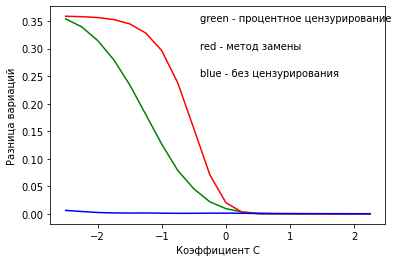

In [25]:
plt.xlabel('Коэффициент C')
plt.ylabel('Разница вариаций')
plt.plot(C_3, var_a_cens_4, color='green')
plt.plot(C_3, var_a_cens_3, color='red')
plt.plot(C_3, var_a, color='blue')
plt.text (-0.40, 0.30, 'red - метод замены')
plt.text (-0.40, 0.35,'green - процентное цензурирование')
plt.text (-0.40, 0.25,'blue - без цензурирования')

In [115]:
c_n = []
c_c = []
for i in range(len(var_sigma)):
    c_c.append((var_a[i] - var_a_cens_3[i]))
    c_n.append((var_a[i] - var_a_cens_4[i]))
    

In [116]:
data = {'Вариация без цензурирования': var_a , 'Разница вариaций дисперсиии при помощи метода замены': \
             var_a_cens_4, 'Разница вариaций дисперсиии с процентным цензурированием': var_a_cens_3} 
 
dff = pd.DataFrame(data)

In [117]:
df1 = dff.iloc [0:6,:]
df2 = dff.iloc [14:20,:]
dff = pd.concat([df1, df2])

In [118]:
dff.transpose()

,0,1,2,3,4,5,14,15,16,17,18,19
Вариация без цензурирования,0.000735,0.000756,0.000812,0.000777,0.000731,0.000747,0.000732,0.000756,0.000715,0.000737,0.000731,0.000732
Разница вариaций дисперсиии с константным цензурированием,0.353779,0.339536,0.315004,0.279582,0.232921,0.179150,0.000323,0.000297,0.000189,0.000093,0.000024,0.000002
Разница вариaций дисперсиии с процентным цензурированием,0.358649,0.357959,0.356365,0.352702,0.344817,0.328373,0.000329,0.000182,0.000070,0.000033,0.000020,0.000004


In [ ]:
u = [] 
a = 0.4ы
y = [0 for _ in range(1000)]
k = []

def yul_walker_cens_4(c, num):
    Var1_x = 0
    Var2_x = 0
    Var1_y = 0
    Var2_y = 0
    for j in range(1000):
        x = []
        x.append(0)
        c1_x = 0
        c0_x = 0
        c1_y = 0
        c0_y = 0
        for t in range(0, 1000):
            u_t = random.normalvariate(mu=0, sigma=1)
            x_t = a * x[t] + u_t
            x.append(x_t)
        k = sorted(x)
        c = k[num]
        for i in range(1000):
            if x[i] > c:
                y[i] = x[i]
            else:
                y[i] = c
        c0_y += y[999] * y[999]
        for t in range(999):
            c1_y += y[t] * y[t + 1] 
            c0_y += y[t] ** 2
        c1_y /= (1000 - 1)
        c0_y /= (1000)
        a_estim_y = c1_y / (c0_y)
        Var1_y += (a_estim_y - a) ** 2
        var_estim_y = c0_y * (1 - a_estim_y ** 2)
        Var2_y += (var_estim_y - 1) ** 2
        c0_x += x[999] * x[999]
        for t in range(999):
            c1_x += x[t] * x[t + 1] 
            c0_x += x[t] ** 2
        c1_x /= (1000 - 1)
        c0_x /= (1000)
        a_estim_x = c1_x / (c0_x)
        Var1_x += (a_estim_x - a) ** 2
        var_estim_x = c0_x * (1 - a_estim_x ** 2)
        Var2_x += (var_estim_x - 1) ** 2
    Var1_x /= 1000
    Var2_x /= 1000
    Var1_y /= 1000
    Var2_y /= 1000
    return abs(Var1_x - Var1_y) / Var1_x, abs(Var2_x - Var2_y) / Var2_x, Var2_x, Var2_y